In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:


df = pd.read_csv("../data/raw/creditcard.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:10])
print(df.head())


Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739

In [4]:
# Class distribution
print(df['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [5]:
# Null values check
print(df.isnull().sum().sum(), "missing values")

0 missing values


In [6]:
# Basic statistics
print(df.describe().T.head(10))

         count          mean           std         min           25%  \
Time  284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1    284807.0  1.175161e-15      1.958696  -56.407510     -0.920373   
V2    284807.0  3.384974e-16      1.651309  -72.715728     -0.598550   
V3    284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4    284807.0  2.094852e-15      1.415869   -5.683171     -0.848640   
V5    284807.0  1.021879e-15      1.380247 -113.743307     -0.691597   
V6    284807.0  1.494498e-15      1.332271  -26.160506     -0.768296   
V7    284807.0 -5.620335e-16      1.237094  -43.557242     -0.554076   
V8    284807.0  1.149614e-16      1.194353  -73.216718     -0.208630   
V9    284807.0 -2.414189e-15      1.098632  -13.434066     -0.643098   

               50%            75%            max  
Time  84692.000000  139320.500000  172792.000000  
V1        0.018109       1.315642       2.454930  
V2        0.065486       0.803724      22.057729  
V3 

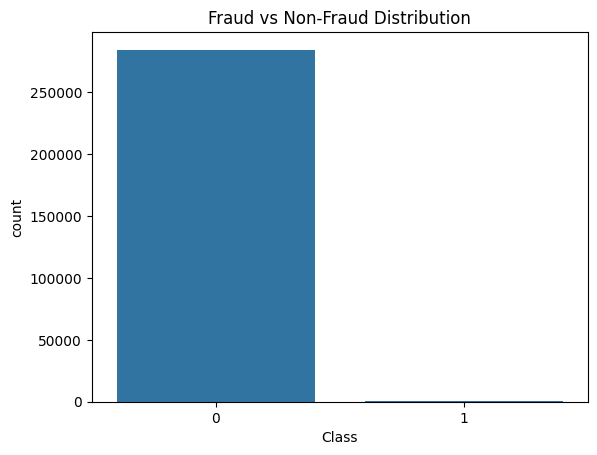

In [8]:
# Fraud vs Non-Fraud distribution
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


Class 0 = Normal payments, Class 1 = Fraud.  
Almost all transactions are normal (~99.8%), and only a very small number are fraud (~0.2%).  
This shows the dataset is **imbalanced**, which is common in real fraud detection.  

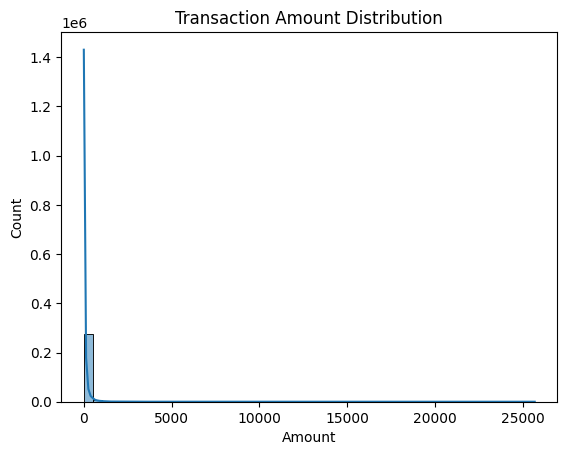

In [9]:

# Transaction Amount
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

Most payments are small (under 100), and only a few are very large (up to 25,000).  
Since the data has a long tail on the right side, this distribution is called **right-skewed**.  


In [10]:

# Convert seconds to hours
df['Hour'] = (df['Time'] / 3600) % 24

# Check sample
print(df[['Time', 'Hour']].head())


   Time      Hour
0   0.0  0.000000
1   0.0  0.000000
2   1.0  0.000278
3   1.0  0.000278
4   2.0  0.000556


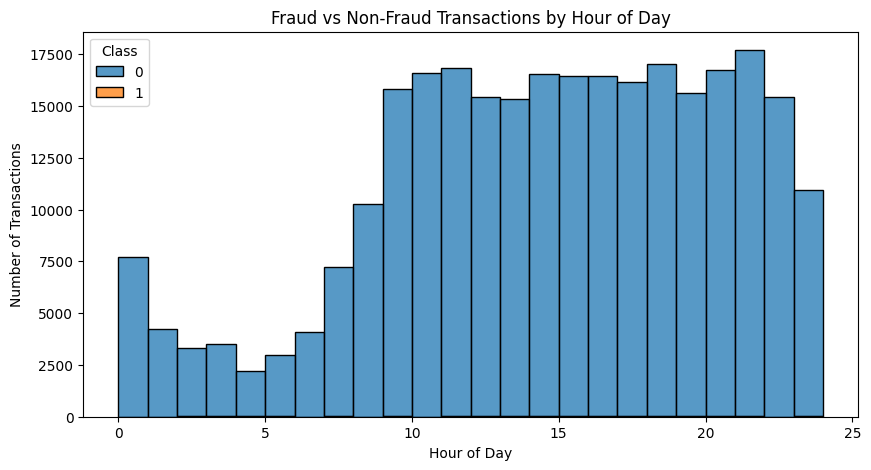

In [11]:
#plot fraud vs non-fraud by hour
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Hour", hue="Class", bins=24, kde=False, multiple="stack")
plt.title("Fraud vs Non-Fraud Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


Most transactions happen during the daytime (9 AM – 9 PM).  
Fraud cases are very few, so they don’t clearly show up in this chart, but usually fraud tends to cluster at off-peak hours (late night or early morning).  
This feature can help capture time-based fraud patterns.  


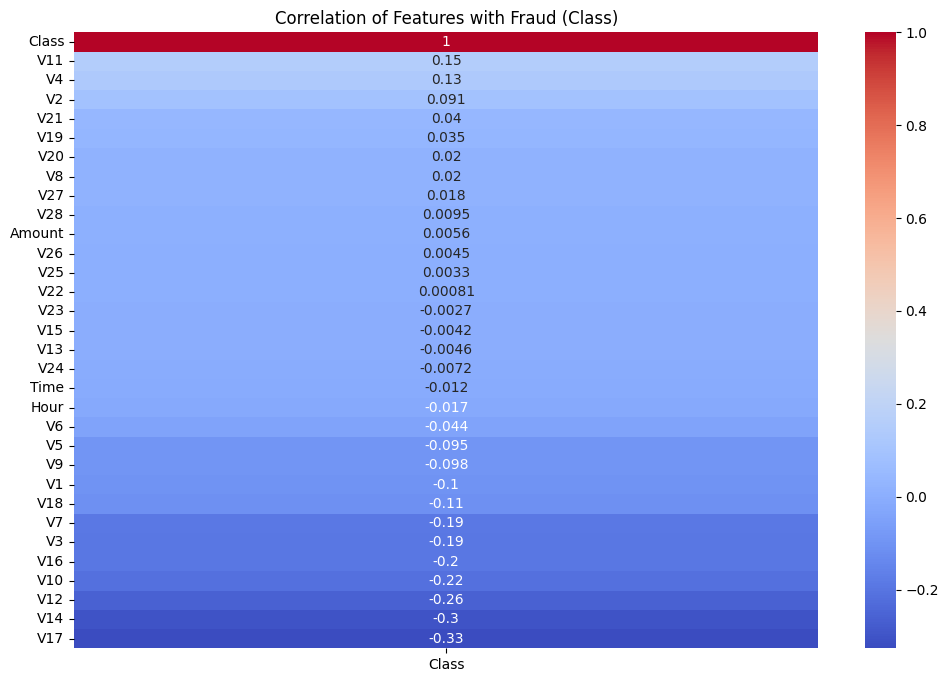

In [12]:
#Correlation HeatMap
plt.figure(figsize=(12,8))
corr = df.corr()

# Focus on correlation with Class
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Fraud (Class)")
plt.show()

### 📊 Correlation with Fraud (Class)

This heatmap shows how strongly each feature (V1–V28, Amount, Time, Hour) is correlated with the target variable (`Class`).

#### 🔹 What correlation means:
- **+1** → Perfect positive relationship (higher feature values → more fraud).
- **-1** → Perfect negative relationship (higher feature values → less fraud).
- **0** → No relationship.

#### 🔹 Observations from the dataset:
- Features with slight **positive correlation**:
  - `V11`, `V4`, `V2` → higher values are weakly linked with fraud.
- Features with slight **negative correlation**:
  - `V17`, `V14`, `V12`, `V10` → lower values are weakly linked with fraud.
- Features with **almost no correlation**:
  - `Amount`, `Time`, most other PCA features → alone, they don’t show fraud patterns.

#### 🔹 Key takeaway:
No single feature has a strong correlation with fraud (all are weak, below ±0.3).  
This means fraud is **not explained by one variable alone** — instead, it comes from complex interactions between multiple features.  
That’s why **machine learning models** (e.g., Logistic Regression, XGBoost, Autoencoders) are needed to detect hidden fraud patterns that simple correlations cannot capture.


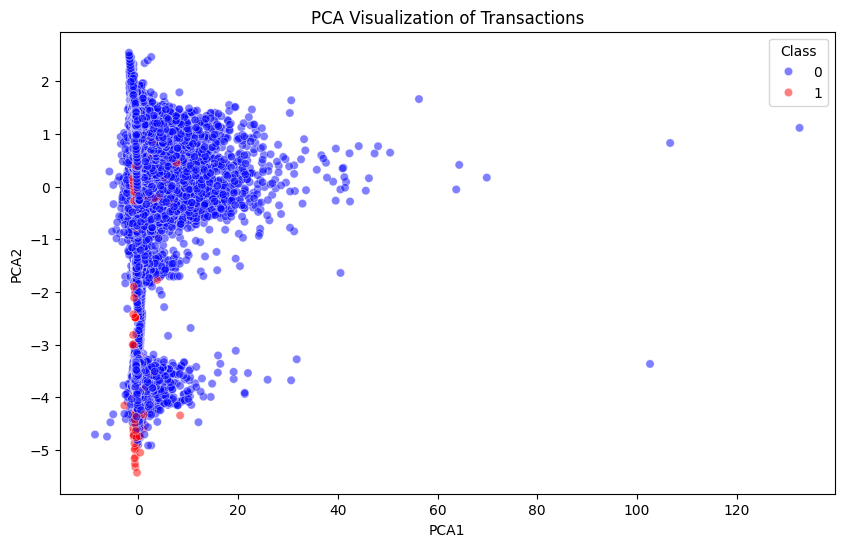

In [13]:
#PCA Visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale features
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x="PCA1", y="PCA2", hue=y, data=df, alpha=0.5, palette={0:"blue", 1:"red"})
plt.title("PCA Visualization of Transactions")
plt.show()


### 🌀 PCA Visualization of Transactions

PCA (Principal Component Analysis) is a **dimensionality reduction technique**.  
- Our dataset has many features (V1–V28 + Amount + Time).  
- PCA compresses them into just **2 main components (PCA1, PCA2)** that capture most of the variance.  
- This allows us to **visualize high-dimensional data in 2D**.

#### 🔹 What this plot shows:
- **Blue points (Class = 0)** → Legit transactions.  
- **Red points (Class = 1)** → Fraudulent transactions.  
- Fraudulent transactions (red) are scattered and mostly overlap with legitimate ones.  
- There is **no clear separation** between fraud and non-fraud in PCA space → meaning fraud is **hidden** and cannot be caught by simple visualization.  

#### 🔹 Key takeaway:
Fraud detection is **not linearly separable** and cannot be solved with basic rules.  
We need advanced models (e.g., XGBoost, Autoencoders) that can capture complex, non-linear relationships among features.


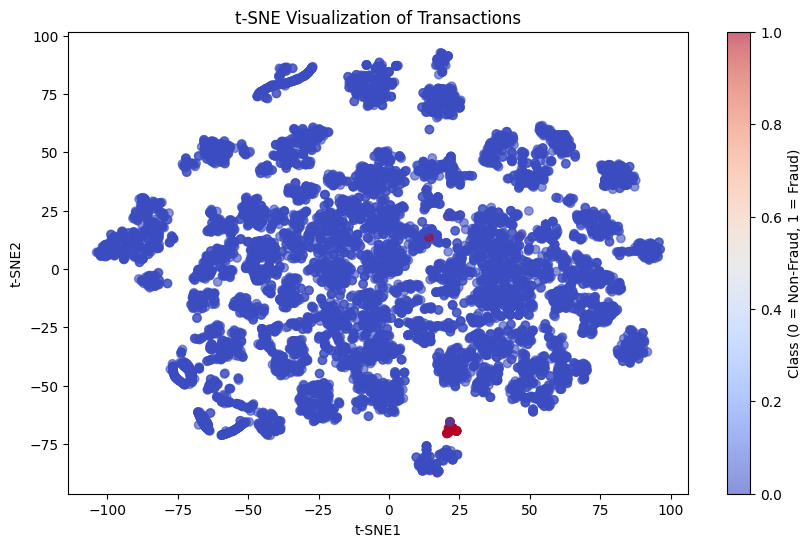

In [15]:
# t-SNE visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use max_iter instead of n_iter
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)

# Run on a subset for speed (10k samples)
tsne_result = tsne.fit_transform(X_scaled[:10000])

# Plot
plt.figure(figsize=(10,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=y[:10000], cmap='coolwarm', alpha=0.6)
plt.colorbar(label="Class (0 = Non-Fraud, 1 = Fraud)")
plt.title("t-SNE Visualization of Transactions")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()


### t-SNE Visualization of Transactions

The plot shows the dataset after reducing **28 anonymized features (V1–V28)** into **two dimensions** using **t-SNE**.

- **Blue points (0)** → Non-fraud transactions  
- **Red points (1)** → Fraudulent transactions  

#### What we see:
- Fraud transactions (red) are **very few compared to blue**, confirming dataset imbalance.  
- Some fraud points form **small, separate clusters**, meaning certain fraud patterns are quite different from normal transactions.  
- However, many fraud points still **overlap with normal ones**, which explains why fraud detection is challenging: fraudsters often try to mimic legitimate transactions.  

#### Key takeaway:
t-SNE helps us see that:
1. Some frauds can be detected because they cluster apart.  
2. Many frauds look very similar to normal activity, so we need **advanced ML models (XGBoost, Autoencoders)** to separate them.


### PCA vs t-SNE Visualization

#### PCA (Principal Component Analysis)
- PCA is a **linear dimensionality reduction** technique.  
- It projects high-dimensional data (28 anonymized features) into 2D using directions that **maximize variance**.  
- In the PCA plot:
  - Fraud points (red) are scattered and **mostly overlap** with normal transactions (blue).
  - There is **no clear separation** between fraud and non-fraud.
- **Limitation**: PCA only captures **linear relationships** and may miss complex fraud patterns.

#### t-SNE (t-Distributed Stochastic Neighbor Embedding)
- t-SNE is a **non-linear dimensionality reduction** technique.  
- It focuses on preserving **local similarity** (points close in high-d space stay close in 2D).  
- In the t-SNE plot:
  - Fraud points (red) form **small clusters**, sometimes separate from normal transactions.
  - This shows **hidden fraud patterns** that PCA couldn’t reveal.
- **Advantage**: t-SNE is better at uncovering **non-linear, complex structures** in fraud data.

#### Key Takeaway
- **PCA** → Good for quick variance-based compression, but fraud and non-fraud overlap heavily.  
- **t-SNE** → Provides better clustering, shows some fraud groups apart from normal transactions.  
- Together, they confirm why **advanced ML models** are needed: fraudsters mimic normal behavior, and simple visualization alone cannot separate them completely.
